## Car price(regression task)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv( 'cars.csv', delimiter = '\t' )
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,1.0


In [4]:
data.shape

(804, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    float64
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    float64
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    float64
 9   Cruise    804 non-null    float64
 10  Sound     804 non-null    float64
 11  Leather   804 non-null    float64
dtypes: float64(8), object(4)
memory usage: 75.5+ KB


dependence of mileage and price

In [6]:
X = data[ ['Mileage'] ]
Y = data['Price']

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(X, Y)

LinearRegression()

In [10]:
y_predict = model.predict(X)

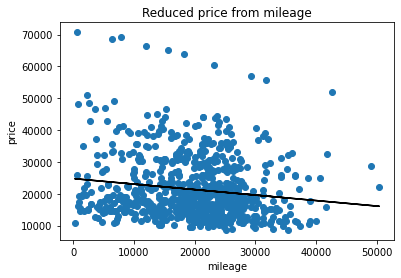

In [11]:
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.title("Reduced price from mileage")
plt.xlabel("mileage")
plt.ylabel("price")
plt.show()

Let's find most expensive car

         Make   Model
150  Cadillac  XLR-V8


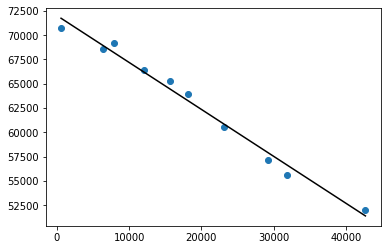

In [12]:
hottest_car = data.sort_values(by='Price').tail(1)[['Make','Model']]
print(hottest_car)
cadillac = data[(data['Make']=='Cadillac')&(data['Model']=='XLR-V8')]
model.fit(cadillac[['Mileage']],cadillac['Price'])
plt.plot(cadillac[['Mileage']], cadillac['Price'], 'o')
plt.plot(cadillac[['Mileage']], model.predict(cadillac[['Mileage']]), 'k-')

In [13]:
model.score(cadillac[['Mileage']],cadillac['Price'])

0.9859638811679218

#### Train linear regression on full data

In [14]:
X = data.drop(['Price'], axis=1)

In [15]:
Y = data['Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
X_train = X_train.drop(['Make', 'Model', 'Trim','Type'], axis=1)
X_test = X_test.drop(['Make', 'Model', 'Trim','Type'], axis=1)

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_predict_2 = model.predict(X_test)

In [20]:
model.score(X_test, y_test)

0.33997793405977816

In [21]:
print('MSE = ',mean_squared_error(y_test, y_predict_2))
print('MAE. = ',mean_absolute_error(y_test, y_predict_2))

MSE =  52349563.785939924
MAE. =  5833.586672777626


## Let's build better model!!!

In [22]:
model = LinearRegression(normalize=True)

In [23]:
types = ['Make', 'Model', 'Trim','Type']
for typ in types:
    data[typ] = data[typ].astype('category')

data = pd.concat([data,pd.get_dummies(data['Make'])],axis=1)

In [24]:
data = pd.concat([data,pd.get_dummies(data['Type'])],axis=1)

In [25]:
data = pd.concat([data,pd.get_dummies(data['Doors'])],axis=1)

In [26]:
data = pd.concat([data,pd.get_dummies(data['Cylinder'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Trim'])],axis=1)

In [27]:
data.drop(['Cylinder'],inplace=True,axis=1)

In [28]:
X = data.drop(['Price','Make', 'Model', 'Trim','Type'], axis=1)

In [29]:
y = data['Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [33]:
model.score(X_test, y_test)

0.9725420637597182

In [34]:
print(dict(zip(model.coef_,X.columns)))

{-1632.7050052095817: 'Mileage', 7795.933498910079: 'Liter', 1.870361128045329e+16: 'Doors', 27.982950386500242: 'Cruise', 55.01361965172577: 'Sound', 153.67397834196456: 'Leather', -5786879829369385.0: 'Buick', -6033463601917172.0: 'Cadillac', -9703562054856234.0: 'Chevrolet', -7644317369848925.0: 'Pontiac', -7699587688935798.0: 'SAAB', -5140319490363836.0: 'Saturn', -2.1633308928548936e+16: 'Convertible', -3.958529259691253e+16: 'Coupe', -4.737440301125693e+16: 'Hatchback', -3.1030538222313296e+16: 'Sedan', -1.4683539826760798e+16: 'Wagon', 8191330963801700.0: 2.0, -1.9846658892345056e+16: 4.0, -6868914607067253.0: 4.0, -6679159052802319.0: 6.0, -4631317185808901.0: 8.0, -6143053389074671.0: 'AWD Sportwagon 4D', -4832458298673212.0: 'Aero Conv 2D', -6239053837354785.0: 'Aero Sedan 4D', -5848875452654272.0: 'Aero Wagon 4D', -4832458298672868.0: 'Arc Conv 2D', -7312283882915826.0: 'Arc Sedan 4D', -5475428285805905.0: 'Arc Wagon 4D', -5519437563121872.0: 'CX Sedan 4D', -5207877945972749

In [35]:
y_predict_2 = model.predict(X_test)

In [36]:
print('MSE = ',mean_squared_error(y_test, y_predict_2))
print('MAE. = ',mean_absolute_error(y_test, y_predict_2))

MSE =  2177822.6196017643
MAE. =  1017.024337365471


In [37]:
%%time
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
import numpy as np
params ={ "loss":['epsilon_insensitive', 'squared_epsilon_insensitive'],'epsilon':np.linspace(1.5,2,10),'C':np.linspace(1,2,10)}
gs = GridSearchCV(LinearSVR(max_iter=1000),params,n_jobs=-1,cv=5)
gs.fit(X_train,y_train)

Wall time: 19.6 s


c:\users\timvo\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ]),
                         'epsilon': array([1.5       , 1.55555556, 1.61111111, 1.66666667, 1.72222222,
       1.77777778, 1.83333333, 1.88888889, 1.94444444, 2.        ]),
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive']})

In [38]:
gs.best_params_

{'C': 1.8888888888888888,
 'epsilon': 1.5555555555555556,
 'loss': 'squared_epsilon_insensitive'}

In [39]:
gs.score(X_test,y_test)

0.9725034967195892

In [40]:
from scipy.stats import reciprocal, uniform

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
params ={'degree':range(7,15), "gamma":reciprocal(0.001,0.1),'C':uniform(0.1,10)}
gsSVR = RandomizedSearchCV(SVR(kernel="poly"),params,n_jobs=-1,cv=5,n_iter=10)
gsSVR.fit(X_train,y_train)


In [ ]:
gsSVR.score(X_test,y_test)

In [ ]:
gsSVR.best_params_